<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-age-at-diagnosis" data-toc-modified-id="Import-age-at-diagnosis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import age at diagnosis</a></span></li><li><span><a href="#Import-fitness-and-establishment-ages" data-toc-modified-id="Import-fitness-and-establishment-ages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import fitness and establishment ages</a></span><ul class="toc-item"><li><span><a href="#Cases" data-toc-modified-id="Cases-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cases</a></span></li><li><span><a href="#Controls" data-toc-modified-id="Controls-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Controls</a></span></li></ul></li><li><span><a href="#Plot-summary-of-acquisition-age-and-fitness-(Figure-4)" data-toc-modified-id="Plot-summary-of-acquisition-age-and-fitness-(Figure-4)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot summary of acquisition age and fitness (Figure 4)</a></span><ul class="toc-item"><li><span><a href="#Controls" data-toc-modified-id="Controls-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Controls</a></span></li></ul></li><li><span><a href="#Plot-cumulative-distribution-of-fitness-effects-for-pre-AML-cases-(Figure-5)" data-toc-modified-id="Plot-cumulative-distribution-of-fitness-effects-for-pre-AML-cases-(Figure-5)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plot cumulative distribution of fitness effects for pre-AML cases (Figure 5)</a></span></li></ul></div>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [38]:
# import packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import csv
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import ast

In [3]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'Helvetica'

In [4]:
# plt.style.use('cwpython.mplstyle') #use custom style file

In [5]:
# Lists of colors for plots
c0 = (0.76, 0.76, 0.76)
c1 = (1.00, 0.18, 0.33);
c2 = (1.00, 0.23, 0.19);
c3 = (1.00, 0.58, 0.00);
c4 = (1.00, 0.80, 0.00);
c5 = (0.30, 0.85, 0.39);
c6 = (0.35, 0.78, 0.98);
c7 = (0.20, 0.67, 0.86);
c8 = (0.00, 0.48, 1.00);
c9 = (0.35, 0.34, 0.84);
c10 = (0.00, 0.31, 0.57);
c11 = (0.12, 0.29, 0.69);
c12 = (0.17, 0.17, 0.42);
c13 = (1.00, 1.00, 1.00);
c14 = (0.77, 0.04, 0.00);

In [6]:
#define the colors from colorbrewer2
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'

In [7]:
multiple_mutant_clone_colors = {1: {1: '#4292c6'},
                               2: {1: '#74c476'},
                               3: {1: '#feb24c'},
                               4: {1: '#b9181f'},
                               5: {1: '#834594'},
                               6: {1: '#4e4d4d'}}

# Import age at diagnosis

In [11]:
#create a dictionary of the sample details
cases = {} #e.g. {'C92_002': ['C92_002_s1', 'C92_002_s2', 'C92_002_s3', 'C92_002_s4'....]}
controls = {} #e.g. {'CNTRL_001': ['CNTRL_001_s1', 'CNTRL_001_s10', 'CNTRL_001_s2'...]}
cases_and_controls = {}
sample_ages = {} #e.g. {'C92_002_s1': 73.73, 'C92_002_s2': 75.0, 'C92_002_s3': 75.83...}
sample_diagnosis_age = {} #e.g. {'C92_002': 81.1, 'C92_003': 75.21, 'C92_005': 70.09...}
sample_DNA_amount = {} #e.g. {'C92_002_s1': '45', 'C92_002_s2': '50', 'C92_002_s3': '50'...}
matched_sample = {} #e.g. {'C92_002': 'CNTRL_169', 'C92_003': 'CNTRL_002'...}

with open('Data_files/UKCTOCS_samples_processed_information.csv') as csvfile:
    readreader = csv.reader(csvfile)
    row_count=0
    for row in readreader:
        if row_count>0:
            sample_name = row[1].split('_')[0]+'_'+row[1].split('_')[1]
            timepoint = row[1]
            sample_ages[timepoint]=float(row[6])
            sample_DNA_amount[timepoint]=row[2]
            if row[7]!='':
                if '_' in row[7]:
                    matched_sample_name = row[7].split('_')[0]+'_'+row[7].split('_')[1]
                    matched_sample[sample_name]=matched_sample_name
                    
            if sample_name in cases_and_controls.keys():
                cases_and_controls[sample_name].append(timepoint)
            else:
                cases_and_controls[sample_name]=[timepoint]
                    
            if row[0]=='Case':
                if sample_name in cases.keys():
                    cases[sample_name].append(timepoint)
                else:
                    cases[sample_name]=[timepoint]
                    
                sample_diagnosis_age[sample_name]=float(row[5])
                
            if row[0]=='Control':
                if sample_name in controls.keys():
                    controls[sample_name].append(timepoint)
                else:
                    controls[sample_name]=[timepoint]
                if sample_name in matched_sample.keys():
                    sample_diagnosis_age[sample_name]=sample_diagnosis_age[matched_sample[sample_name]]

        row_count+=1
        
# sample_diagnosis_age

In [12]:
sample_diagnosis_age_sorted = {k: v for k, v in sorted(sample_diagnosis_age.items(), key=lambda item: item[1], reverse = True)}

# Import fitness and establishment ages

In [13]:
def import_fitness_est_times(sample_name):
    df = pd.read_csv("Data_files/Optimiser_results_v14.txt", sep = '\t')
    df_sample = df[df['Sample_name']==sample_name]
    df_sample['Fitnesses'] = df_sample['Fitnesses'].apply(ast.literal_eval)
    df_sample['Tau_times'] = df_sample['Tau_times'].apply(ast.literal_eval)
    df_sample['Establishment_ages'] = df_sample['Establishment_ages'].apply(ast.literal_eval)
    df_sample['Variant_colors'] = df_sample['Variant_colors'].apply(ast.literal_eval)
    df_sample['Clone_colors'] = df_sample['Clone_colors'].apply(ast.literal_eval)
    df_sample = df_sample[['Sample_name', 'Fitnesses', 'Tau_times', 'Establishment_ages', 'Variant_colors', 'Clone_colors']]
    df_sample = df_sample.set_index('Sample_name')
    df_sample_dict = pd.DataFrame.to_dict(df_sample, orient = 'index')
    
    fitness_est_time_dict = {}
    for clone, fitness in df_sample_dict[sample_name]['Fitnesses'].items():
        tau_time = df_sample_dict[sample_name]['Tau_times'][clone]
        establishment_time = df_sample_dict[sample_name]['Establishment_ages'][clone]
        fitness_est_time_dict[clone] = {'fitness': fitness, 'est_time': tau_time, 'establishment_time': establishment_time}
    
    return fitness_est_time_dict

## Cases

In [18]:
fitness_est_time_dictionary_cases = {}
for sample_name in cases.keys():
    if sample_name not in ['C92_015', 'C92_039', 'C92_043', 'C92_044', 'C92_048', 'C92_063']: #samples without mutations
        s_t_dict = import_fitness_est_times(sample_name)
        fitness_est_time_dictionary_cases[sample_name]=s_t_dict

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [19]:
#create a dictionary of the fittest clone in each sample (i.e. the most likely clone to be the AML clone)
fittest_clone_cases = {}
for sample_name, results in fitness_est_time_dictionary_cases.items(): #sorted by age at diagnosis of AML
    sample_clone_fitnesses = {}
    for variant, details in results.items():
        sample_clone_fitnesses[variant]=details['fitness']
        
    sorted_fitness = [(k, v) for k, v in sorted(sample_clone_fitnesses.items(), key=lambda item: item[1], reverse = True)]
    fittest_clone_cases[sample_name]=sorted_fitness[0][0]

fittest_clone_cases

{'C92_002': ('DNMT3A_p.Q606X',
  'SF3B1_p.K700E',
  'TET2_p.P869Qfs*4',
  'TET2_p.Q108Ffs*6'),
 'C92_003': ('DNMT3A_p.R736H', 'DNMT3A_p.P777R', 'chr7q_CNLOH', 'X'),
 'C92_005': ('TET2_p.Q538X', 'GATA2_p.A302S', 'DNMT3A_p.R544S'),
 'C92_007': ('SRSF2_p.P95L', 'IDH2_p.R140Q'),
 'C92_008': ('TET2_p.G1361V',),
 'C92_009': ('TP53_p.V216M', 'U2AF1_p.Q157R'),
 'C92_011': ('X', 'TP53_p.H193R'),
 'C92_012': ('SRSF2_p.P95H', 'TET2_p.N1266S', 'X'),
 'C92_016': ('NPM1_p.W288Cfs*12', 'WT1_p.V384Dfs*8', 'FLT3_ITD'),
 'C92_018': ('SF3B1_p.K666N',
  'NPM1_p.W288Cfs*12',
  'WT1_p.E500K',
  'WT1_p.R385Gfs*5'),
 'C92_019': ('BCORL1_p.R1536H', 'X'),
 'C92_022': ('TET2_p.S1593Afs*3',
  'TET2_p.H1380D',
  'SRSF2_p.P95H',
  'JAK2_p.V617F',
  'chr9p_CNLOH',
  'X'),
 'C92_023': ('TET2_p.P1079Qfs*3', 'ASXL1_p.G643Rfs*15', 'NRAS_p.G12D', 'X'),
 'C92_024': ('DNMT3A_p.K154del', 'WT1_p.P381Rfs*73'),
 'C92_032': ('DNMT3A_p.L637P', 'DNMT3A_p.R688G'),
 'C92_033': ('SRSF2_p.P95H', 'TET2_p.H1036Tfs*19', 'MPL_p.Y591D'),


In [20]:
duration_first_to_AML = {}

for sample_name, results in fitness_est_time_dictionary_cases.items(): #sorted by age at diagnosis of AML
    age_at_diagnosis = sample_diagnosis_age[sample_name]
    AML_clone = fittest_clone_cases[sample_name]
    timepoints = []
    
    if 'C92' in sample_name:
        for variant, details in results.items():
            latest_mutation = variant[-1]
            if latest_mutation in AML_clone:
                timepoints.append(details['establishment_time']) #the age the frequency is 1/10**5 (i.e. 1/N)
            
        sorted_timepoints = sorted(timepoints)
        time_from_first_to_AML = age_at_diagnosis-timepoints[0]
        duration_first_to_AML[sample_name] = time_from_first_to_AML
        
no_mutation_cases = {}
for case in cases.keys():
    if case not in fitness_est_time_dictionary_cases.keys():
        age_at_diagnosis = sample_diagnosis_age[case]
        no_mutation_cases[case]=age_at_diagnosis

no_mutation_cases = {k: v for k, v in sorted(no_mutation_cases.items(), key=lambda item: item[1], reverse = False)}    
    
for case in no_mutation_cases.keys():
    duration_first_to_AML[case]=0 #store the ones that have no mutations as 0
        
sample_time_to_AML = {k: v for k, v in sorted(duration_first_to_AML.items(), key=lambda item: item[1], reverse = False)}
# sample_time_to_AML

## Controls

In [21]:
fitness_est_time_dictionary_controls = {}
for sample_name in controls.keys():
    if sample_name not in ['CNTRL_003', 'CNTRL_161', 'CNTRL_165', 'CNTRL_170',
                          'CNTRL_171', 'CNTRL_174', 'CNTRL_177', 'CNTRL_181',
                          'CNTRL_188', 'CNTRL_189', 'CNTRL_198', 'CNTRL_200']: #samples without mutations
        s_t_dict = import_fitness_est_times(sample_name)
        fitness_est_time_dictionary_controls[sample_name]=s_t_dict

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [22]:
control_oldest_timepoint_age = {}
for timepoint, age in sample_ages.items():
    if 'CNTRL' in timepoint:
        control_name = timepoint.split('_')[0]+'_'+timepoint.split('_')[1]
        if control_name in control_oldest_timepoint_age.keys():
            current_age_in_dict = control_oldest_timepoint_age[control_name]
            if age > current_age_in_dict:
                control_oldest_timepoint_age[control_name] = age
        else:
            control_oldest_timepoint_age[control_name] = age
            
#sort dictionary by age
control_latest_ages_sorted = {k: v for k, v in sorted(control_oldest_timepoint_age.items(), key=lambda item: item[1], reverse = False)}

# Plot summary of acquisition age and fitness (Figure 4)

In [26]:
#cumulative incidence of mutations by time pre-AML
#if only double mutant clone present, make sure est time of single-mutant is also stored
fitness_est_time_dictionary_all_mutations_cases = {} #add in single mutant clones if only the double is in the dictionary
for sample, clones in fitness_est_time_dictionary_cases.items():
    sample_all_clones = {}
    for variants, details in clones.items(): #variants = the mutations in the clone, e.g. ('DNMT3A_p.R882C', 'DNMT3A_p.P904L')
        sample_all_clones[variants]=details
        if len(variants)>=2:
            if variants[:-1] not in clones.keys(): #i.e. if penultimate clone not in dictionary
                sample_all_clones[variants[:-1]]=details #store the same info for the predecessor clone as its successor
        if len(variants)>=3:
            if variants[:-2] not in clones.keys():
                sample_all_clones[variants[:-2]]=details #store the same info for the predecessor clone as its successor
    fitness_est_time_dictionary_all_mutations_cases[sample]=sample_all_clones
                
        
mutation_acquisition_age_cases = {} #key = number of mutations, v = list of acquisition ages
mutation_person_number_cases = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[]}

for sample, clones in fitness_est_time_dictionary_all_mutations_cases.items():
    for variants, details in clones.items(): #variants = the mutations in the clone, e.g. ('DNMT3A_p.R882C', 'DNMT3A_p.P904L')
        latest_mutation = variants[-1]
        number_of_mutations = len(variants)

        if number_of_mutations in mutation_person_number_cases.keys():
            if sample not in mutation_person_number_cases[number_of_mutations]: #i.e. don't count people twice if they have e.g. multiple single mutant clones
                mutation_person_number_cases[number_of_mutations].append(sample)
                if number_of_mutations in mutation_acquisition_age_cases.keys():
                    mutation_acquisition_age_cases[number_of_mutations].append(details['establishment_time'])
                else:
                    mutation_acquisition_age_cases[number_of_mutations] = [details['establishment_time']]
        else:
            if sample not in mutation_person_number_cases[number_of_mutations]:
                mutation_person_number_cases[number_of_mutations]=[sample]
                if number_of_mutations in mutation_acquisition_age_cases.keys():
                    mutation_acquisition_age_cases[number_of_mutations].append(details['establishment_time'])
                else:
                    mutation_acquisition_age_cases[number_of_mutations] = [details['establishment_time']]
                
mutation_acquisition_age_all_people_cases = {}
for k, v in mutation_acquisition_age_cases.items():
    new_v = sorted(v)
    for i in range(0, len(sample_time_to_AML.keys())-len(v)):
        new_v.append(110)
    mutation_acquisition_age_all_people_cases[k]=new_v                

# mutation_acquisition_age_all_cases = {k: sorted(v) for k, v in sorted(mutation_acquisition_age_cases.items(), key=lambda item: item[0])}
                
mutation_acquisition_age_all_cases = {}
for number_mutations, list_est_times in mutation_acquisition_age_cases.items():
    new_list_est_times = list_est_times
    for i in range(0, len(sample_time_to_AML.keys())-len(list_est_times)): #i.e. for those that didn't acquire that number of mutations
        new_list_est_times.append(110) #assign acquisition age of 110 (so normalisation is correct)
    mutation_acquisition_age_all_cases[number_mutations]=new_list_est_times

mutation_acquisition_age_all_cases = {k: sorted(v) for k, v in sorted(mutation_acquisition_age_cases.items(), key=lambda item: item[0])}

C92_063
C92_044
C92_015
C92_039
C92_043
C92_048


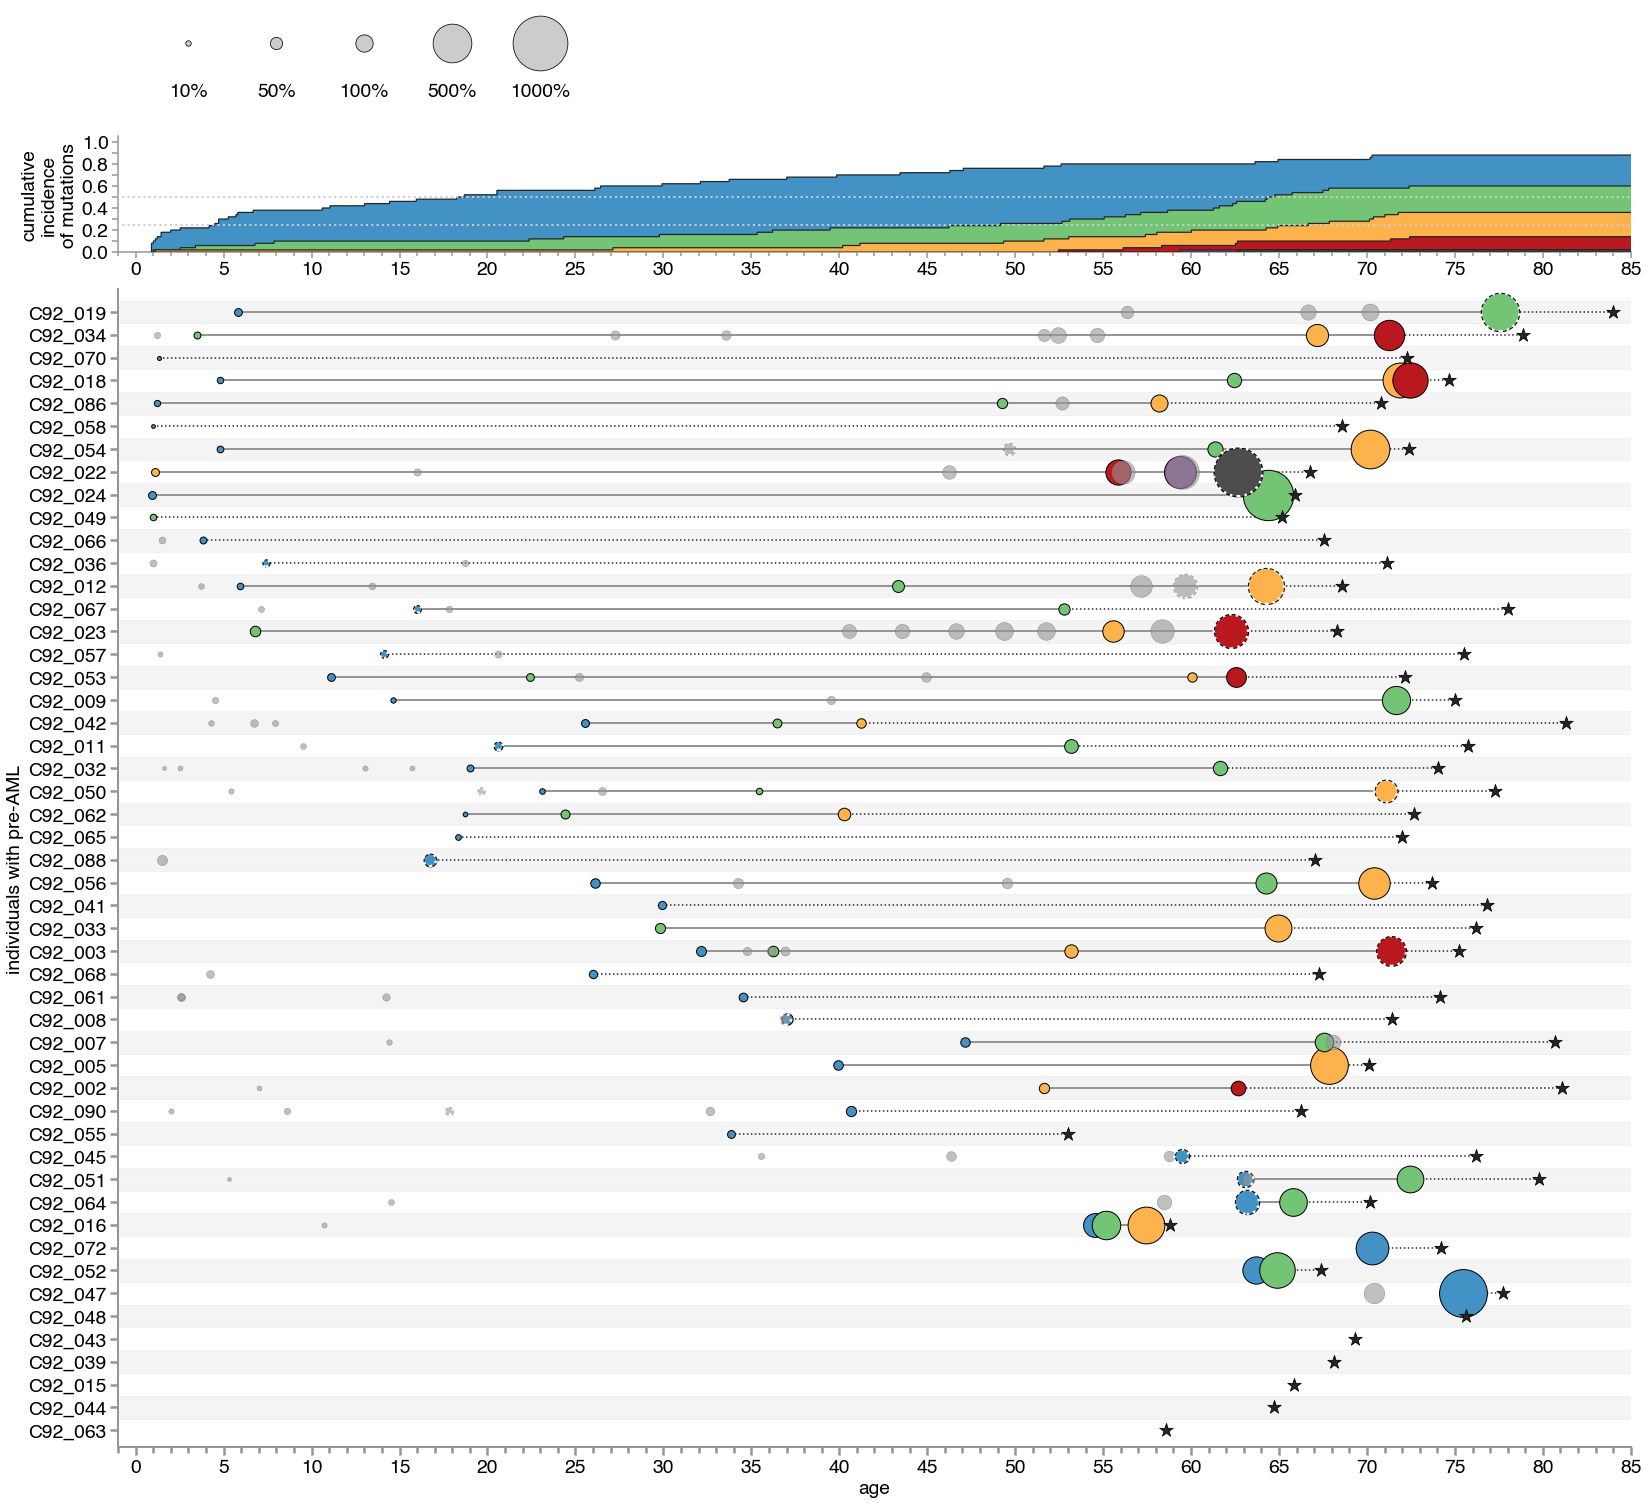

In [27]:
#plot acquisition age and fitness for all samples
fig, axes = plt.subplots(3, 1, figsize = (23, 21), gridspec_kw={'height_ratios': [2, 2.5, 25]})

ax0 = axes[0]
ax2 = axes[1]
ax1 = axes[2]

diagnosis_age = []
case_names = []

x_cases_AMLclone = []
y_cases_AMLclone = []
size_cases_AMLclone = []
colours_AMLclone = []

x_cases_nonAMLclone = []
y_cases_nonAMLclone = []
size_cases_nonAMLclone = []
colours_nonAMLclone = []

x_cases_missing_driver = []
y_cases_missing_driver = []
size_cases_missing_driver = []

line_cases_y = []
line_cases = []
final_to_diagnosis_line_y = []
final_to_diagnosis_line = []

number_mutations = []

helvetica_6 = 19.25

#################. PLOT ACQUISITION AGE AND FITNESS EFFECT ##########################
for sample_name in sample_time_to_AML.keys(): #sorted by total time taken to develop AML
    if sample_name in fitness_est_time_dictionary_cases.keys():
        if 'C92' in sample_name:
            results = fitness_est_time_dictionary_cases[sample_name]
            timepoints = []
#             print(sample_name)
            age_at_diagnosis = sample_diagnosis_age[sample_name]
#             print(age_at_diagnosis)
            diagnosis_age.append(age_at_diagnosis)
            case_names.append(sample_name)
            AML_clone = fittest_clone_cases[sample_name]
            
            for variant, details in results.items():
                number_of_mutations_in_clone = len(variant)
                number_mutations.append(number_of_mutations_in_clone)
                latest_mutation = variant[-1]
#                 timepoints.append(details['est_time'])
                
                if latest_mutation in AML_clone:
                    y_cases_AMLclone.append(sample_name)
                    x_cases_AMLclone.append(details['establishment_time'])
                    size_cases_AMLclone.append(details['fitness']*300)
                    colours_AMLclone.append(multiple_mutant_clone_colors[number_of_mutations_in_clone][1])
                    timepoints.append(details['establishment_time'])
                else:
                    y_cases_nonAMLclone.append(sample_name)
                    x_cases_nonAMLclone.append(details['establishment_time'])
                    size_cases_nonAMLclone.append(details['fitness']*300)
                    colours_nonAMLclone.append(multiple_mutant_clone_colors[number_of_mutations_in_clone][1])
                
                if latest_mutation in ['X', 'Y', 'Z']: #missing driver
                    x_cases_missing_driver.append(details['establishment_time'])
                    y_cases_missing_driver.append(sample_name)
                    size_cases_missing_driver.append(details['fitness']*300)
                
            sorted_timepoints = sorted(timepoints)
            
            if len(timepoints)==1:
                final_to_diagnosis_line_y.append([sample_name, sample_name])
                final_to_diagnosis_line.append([timepoints[0], age_at_diagnosis])
            if len(timepoints)>1:
                line_cases_y.append([sample_name for i in sorted_timepoints])
                line_cases.append(sorted_timepoints)
                final_to_diagnosis_line_y.append([sample_name, sample_name])
                final_to_diagnosis_line.append([sorted_timepoints[-1], age_at_diagnosis])
                
    else:
        print(sample_name)
        age_at_diagnosis = sample_diagnosis_age[sample_name]
        diagnosis_age.append(age_at_diagnosis)
        case_names.append(sample_name)
        
ax1.scatter(diagnosis_age, case_names, color = grey5, edgecolor = 'k', lw = 0.75, marker = '*', s = 200, zorder = 500)
                
for x, y, size, color in zip(x_cases_AMLclone, y_cases_AMLclone, size_cases_AMLclone, colours_AMLclone):
#     ax1.scatter(x, y, s = 10, marker = 'o', lw = 0.75, color = 'k', zorder = 10) #central dot
    ax1.scatter(x, y, s = size, marker = 'o', edgecolor = 'k', lw = 1, color = color, zorder = 1, alpha = 1.0)
    
for x, y, size, color in zip(x_cases_nonAMLclone, y_cases_nonAMLclone, size_cases_nonAMLclone, colours_nonAMLclone):
#     ax1.scatter(x, y, s = 10, marker = 'o', lw = 0.75, color = grey3, zorder = 10) #central dot
    ax1.scatter(x, y, s = size, marker = 'o', edgecolor = grey4, lw = 0.5, color = grey3, zorder = 1, alpha = 0.6)
    
for a, b in zip((line_cases), (line_cases_y)):
    ax1.plot(a, b, color = grey3, zorder = 0, lw = 2)
    
for a, b in zip((final_to_diagnosis_line), (final_to_diagnosis_line_y)):
    ax1.plot(a, b, color = grey5, zorder = 0, linestyle = ':', lw = 1.5)
    
# patterns = ('-', '+', 'x', '\\', '*', 'o', 'O', '.', '/')
pattern = '//'
for x, y, size in zip(x_cases_missing_driver, y_cases_missing_driver, size_cases_missing_driver):
#     ax1.scatter(x, y, s = size, facecolors='none', edgecolor = 'k', linestyle = ':', lw = 0.5, hatch = 3*pattern)
    ax1.scatter(x, y, s = size, facecolors='none', edgecolor = 'white', linestyle = ':', lw = 2.5)

ax1.set_ylim(-0.75, 49.99)
ax1.set_xlim(-1, 85)
ax1.set_xlabel('age', fontsize = helvetica_6)
ax1.set_ylabel('individuals with pre-AML', fontsize = helvetica_6)

ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax1.xaxis.set_major_locator(MultipleLocator(10))

yticks, _ = plt.yticks()
for y0, y1 in zip(yticks[::2], yticks[1::2]):
    plt.axhspan(y0+0.5, y1+0.5, color=grey2, alpha=0.2, zorder=0)
    
#Only show the required axis lines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax1.spines[axis].set_linewidth(2)
    ax1.spines[axis].set_color(grey3)
    
ax1.yaxis.set_tick_params(width=2.5, color = grey3, length = 8, which = 'major', labelsize=helvetica_6)
ax1.xaxis.set_tick_params(width=2.5, color = grey3, length = 8, which = 'major', labelsize=helvetica_6)
ax1.xaxis.set_tick_params(width=2.5, color = grey3, length = 6, which = 'minor')
ax1.xaxis.set_major_locator(MultipleLocator(5))
ax1.xaxis.set_minor_locator(MultipleLocator(1))

############# PLOT CUMULATIVE ACQUISITION OF MUTATIONS #########################
for k, v in mutation_acquisition_age_all_cases.items():
    n, bins, patches = ax2.hist(v, 1000, density=True, color = multiple_mutant_clone_colors[k][1], histtype = 'stepfilled', lw = 1.25, edgecolor = grey5,
                                   cumulative=True, label="Cumulative histogram", range =(min(v), 110), zorder = 50)
#     ax1.add_patch(Rectangle((v[-1], 0), 87-v[-1], 1.05, facecolor = 'white', zorder = 500))

ax2.plot([-5, 90], [0.5, 0.5], lw = 2, linestyle = ':', zorder = 100, color = grey2)
ax2.plot([-5, 90], [0.25, 0.25], lw = 2, linestyle = ':', zorder = 100, color = grey2)

ax2.set_xlim(-1, 85)
ax2.set_ylabel('cumulative\nincidence\nof mutations', fontsize = helvetica_6)
ax2.xaxis.set_minor_locator(MultipleLocator(1))
ax2.xaxis.set_major_locator(MultipleLocator(5))
ax2.yaxis.set_major_locator(MultipleLocator(0.2))
ax2.yaxis.set_minor_locator(MultipleLocator(0.1))
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.yaxis.set_tick_params(which = 'both', width=1.5, color = grey3, length = 6, labelsize=helvetica_6)
ax2.xaxis.set_tick_params(which = 'major', width=1.5, color = grey3, length = 6, labelsize=helvetica_6)
ax2.xaxis.set_tick_params(which = 'minor', width=1.5, color = grey3, length = 4)
for axis in ['bottom','left']:
    ax2.spines[axis].set_linewidth(1.5)
    ax2.spines[axis].set_color(grey3)
    
# ax2.grid(which = 'both', axis = 'y', zorder = 0, color = grey2)


############# PLOT LEGEND OF MARKER SIZE ########################
x_cases_1 = []
y_cases_1 = []
size_cases_1 = []

n = 3
for fitness in [0.1, 0.5, 1, 5, 10]:
    ax0.scatter(n, 1.5, s = fitness*300, color = grey2, lw = 0.75, edgecolor = 'k')
    ax0.text(n, 0.2, str(int((fitness)*100))+'%', fontsize = helvetica_6, ha = 'center', va = 'center')
    n+=5
#     ax1.scatter(str(fitness), 0.75, s = fitness*300, color = grey2, lw = 0.75, edgecolor = 'k')

ax0.set_ylim(0, 2.5)
for axis in ['top', 'right', 'bottom','left']:
    ax0.spines[axis].set_visible(False)
    
ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_xlim(-1, 85)

plt.tight_layout()
plt.show()

## Controls

In [28]:
#cumulative incidence of mutations by time
#if only double mutant clone present, make sure est time of single-mutant is also stored
fitness_est_time_dictionary_all_mutations_controls = {} #add in single mutant clones if only the double is in the dictionary
for sample, clones in fitness_est_time_dictionary_controls.items():
    sample_all_clones = {}
    for variants, details in clones.items(): #variants = the mutations in the clone, e.g. ('DNMT3A_p.R882C', 'DNMT3A_p.P904L')
        sample_all_clones[variants]=details
        if len(variants)>=2:
            if variants[:-1] not in clones.keys(): #i.e. if penultimate clone not in dictionary
                sample_all_clones[variants[:-1]]=details #store the same info for the predecessor clone as its successor
        if len(variants)>=3:
            if variants[:-2] not in clones.keys():
                sample_all_clones[variants[:-2]]=details #store the same info for the predecessor clone as its successor
    fitness_est_time_dictionary_all_mutations_controls[sample]=sample_all_clones
                
        
mutation_acquisition_age_controls = {} #key = number of mutations, v = list of acquisition ages
mutation_person_number_controls = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[]}

for sample, clones in fitness_est_time_dictionary_all_mutations_controls.items():
    for variants, details in clones.items(): #variants = the mutations in the clone, e.g. ('DNMT3A_p.R882C', 'DNMT3A_p.P904L')
        latest_mutation = variants[-1]
        number_of_mutations = len(variants)

        if number_of_mutations in mutation_person_number_controls.keys():
            if sample not in mutation_person_number_controls[number_of_mutations]: #i.e. don't count people twice if they have e.g. multiple single mutant clones
                mutation_person_number_controls[number_of_mutations].append(sample)
                if number_of_mutations in mutation_acquisition_age_controls.keys():
                    mutation_acquisition_age_controls[number_of_mutations].append(details['establishment_time'])
                else:
                    mutation_acquisition_age_controls[number_of_mutations] = [details['establishment_time']]
        else:
            if sample not in mutation_person_number_controls[number_of_mutations]:
                mutation_person_number_controls[number_of_mutations]=[sample]
                if number_of_mutations in mutation_acquisition_age_controls.keys():
                    mutation_acquisition_age_controls[number_of_mutations].append(details['establishment_time'])
                else:
                    mutation_acquisition_age_controls[number_of_mutations] = [details['establishment_time']]
                
mutation_acquisition_age_all_people_controls = {}
for k, v in mutation_acquisition_age_controls.items():
    new_v = sorted(v)
    for i in range(0, len(controls.keys())-len(v)):
        new_v.append(110)
    mutation_acquisition_age_all_people_controls[k]=new_v                

# mutation_acquisition_age_all_controls = {k: sorted(v) for k, v in sorted(mutation_acquisition_age_controls.items(), key=lambda item: item[0])}
                
mutation_acquisition_age_all_controls = {}
for number_mutations, list_est_times in mutation_acquisition_age_controls.items():
    new_list_est_times = list_est_times
    for i in range(0, len(controls.keys())-len(list_est_times)): #i.e. for those that didn't acquire that number of mutations
        new_list_est_times.append(110) #assign acquisition age of 110 (so normalisation is correct)
    mutation_acquisition_age_all_controls[number_mutations]=new_list_est_times

mutation_acquisition_age_all_controls = {k: sorted(v) for k, v in sorted(mutation_acquisition_age_controls.items(), key=lambda item: item[0])}

CNTRL_174
CNTRL_188
CNTRL_165
CNTRL_181
CNTRL_177
CNTRL_161
CNTRL_170
CNTRL_200
CNTRL_171
CNTRL_198
CNTRL_189
CNTRL_003


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('|').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


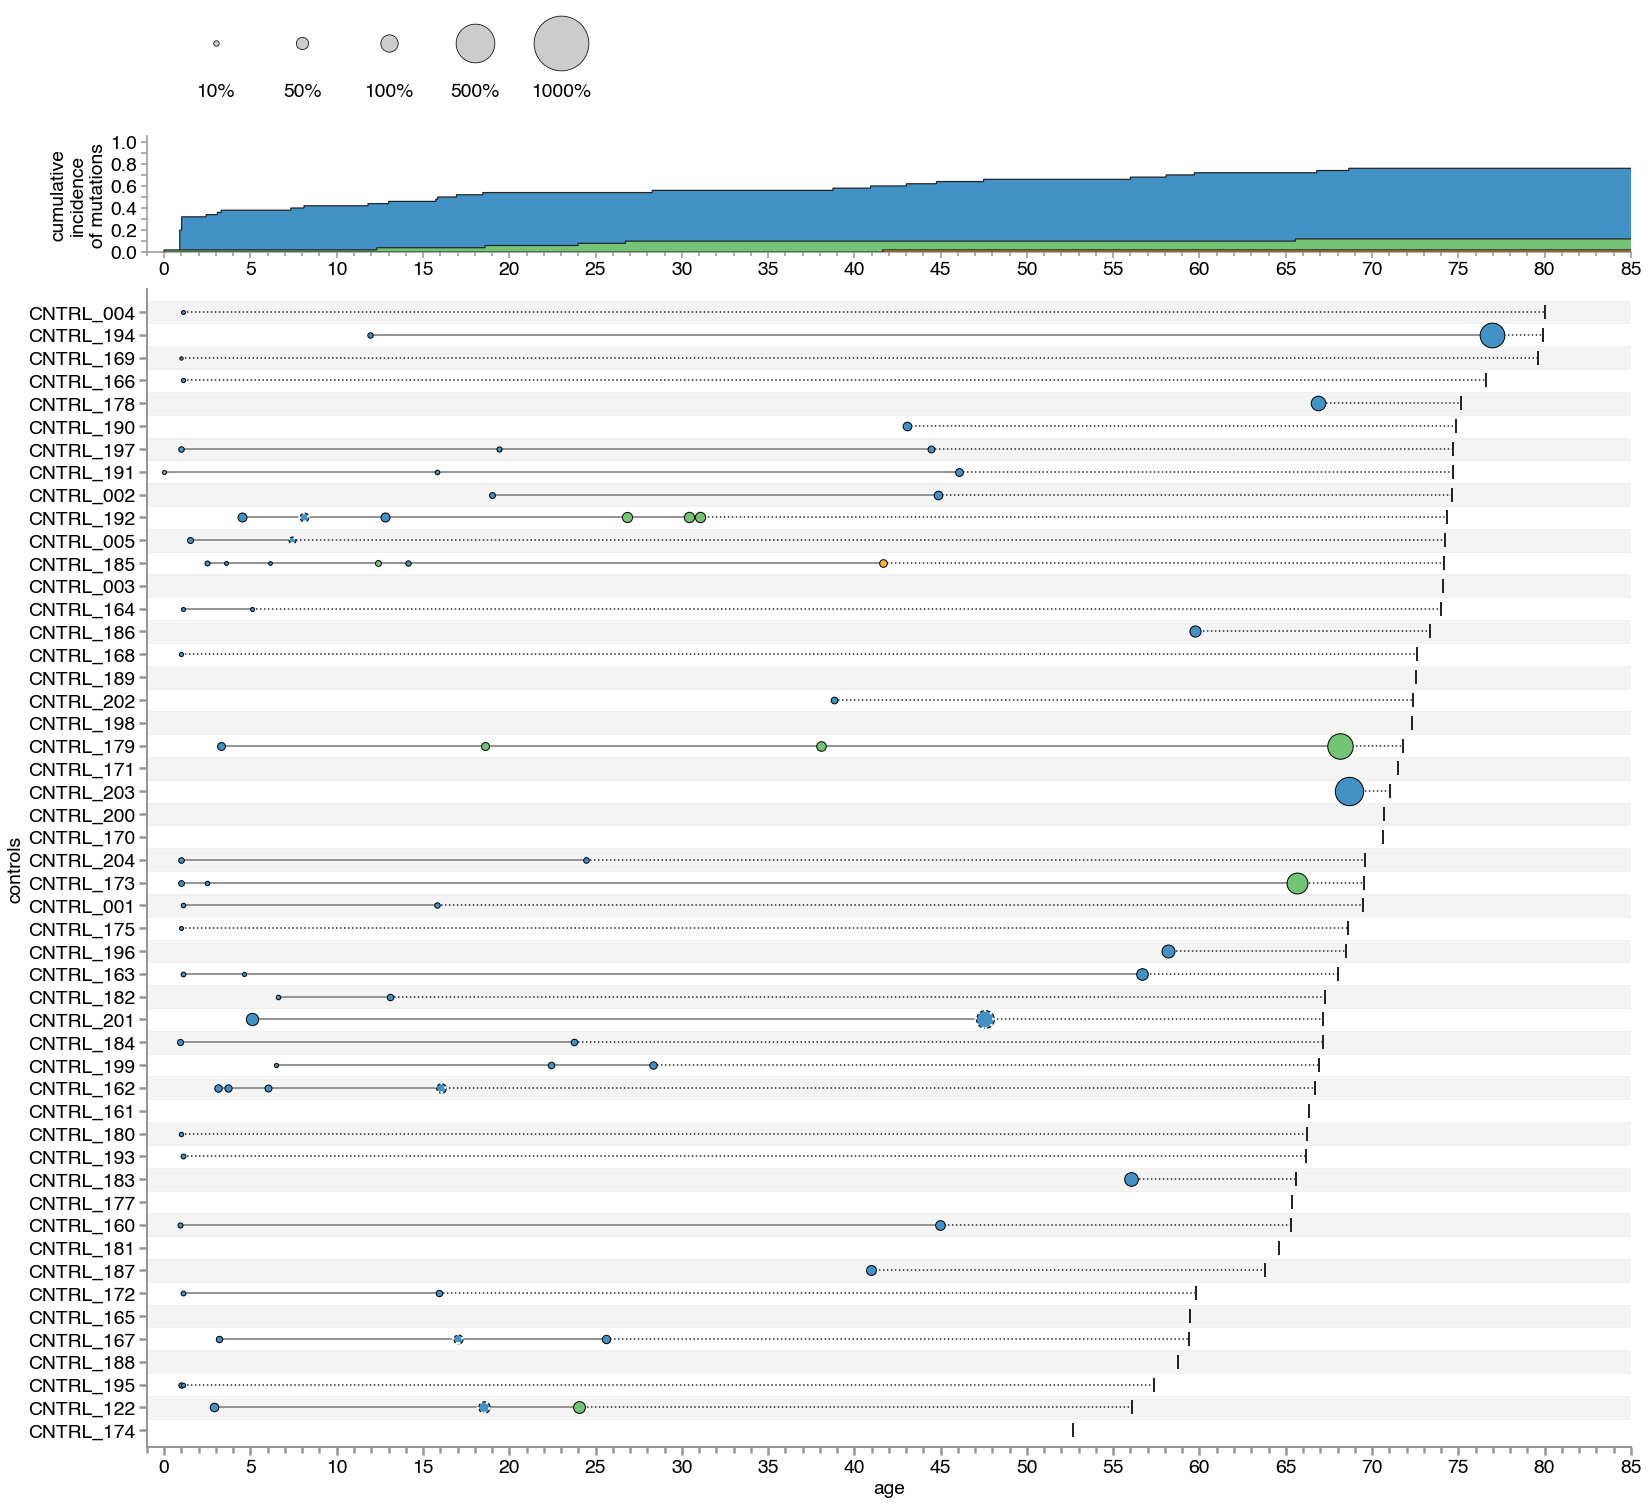

In [30]:
#plot acquisition age and fitness for all samples
fig, axes = plt.subplots(3, 1, figsize = (23, 21), gridspec_kw={'height_ratios': [2, 2.5, 25]})

ax0 = axes[0]
ax2 = axes[1]
ax1 = axes[2]

last_timepoint_list = []
control_names = []

x_controls_AMLclone = []
y_controls_AMLclone = []
size_controls_AMLclone = []
colours_AMLclone = []

x_controls_nonAMLclone = []
y_controls_nonAMLclone = []
size_controls_nonAMLclone = []
colours_nonAMLclone = []

x_controls_missing_driver = []
y_controls_missing_driver = []
size_controls_missing_driver = []

line_controls_y = []
line_controls = []
final_to_diagnosis_line_y = []
final_to_diagnosis_line = []

number_mutations = []

helvetica_6 = 19.25

#################. PLOT ACQUISITION AGE AND FITNESS EFFECT ##########################
for sample_name in control_latest_ages_sorted.keys(): #sorted by total time taken to develop AML
    last_timepoint = control_latest_ages_sorted[sample_name]
    if sample_name in fitness_est_time_dictionary_controls.keys():
        if 'CNTRL' in sample_name:
            results = fitness_est_time_dictionary_controls[sample_name]
            timepoints = []
            last_timepoint_list.append(last_timepoint)
            control_names.append(sample_name)
            
            for variant, details in results.items():
                number_of_mutations_in_clone = len(variant)
                number_mutations.append(number_of_mutations_in_clone)
                latest_mutation = variant[-1]
            
                y_controls_nonAMLclone.append(sample_name)
                x_controls_nonAMLclone.append(details['establishment_time'])
                size_controls_nonAMLclone.append(details['fitness']*300)
                colours_nonAMLclone.append(multiple_mutant_clone_colors[number_of_mutations_in_clone][1])
                timepoints.append(details['establishment_time'])
                
                if latest_mutation in ['X', 'Y', 'Z']: #missing driver
                    x_controls_missing_driver.append(details['establishment_time'])
                    y_controls_missing_driver.append(sample_name)
                    size_controls_missing_driver.append(details['fitness']*300)
                
            sorted_timepoints = sorted(timepoints)
            
            if len(timepoints)==1:
                final_to_diagnosis_line_y.append([sample_name, sample_name])
                final_to_diagnosis_line.append([timepoints[0], last_timepoint])
            if len(timepoints)>1:
                line_controls_y.append([sample_name for i in sorted_timepoints])
                line_controls.append(sorted_timepoints)
                final_to_diagnosis_line_y.append([sample_name, sample_name])
                final_to_diagnosis_line.append([sorted_timepoints[-1], last_timepoint])
                
    else:
        print(sample_name)
        last_timepoint_list.append(last_timepoint)
        control_names.append(sample_name)
        
ax1.scatter(last_timepoint_list, control_names, color = grey5, edgecolor = 'k', lw = 2, marker = '|', s = 200, zorder = 500)

for x, y, size, color in zip(x_controls_nonAMLclone, y_controls_nonAMLclone, size_controls_nonAMLclone, colours_nonAMLclone):
    ax1.scatter(x, y, s = size, marker = 'o', edgecolor = 'k', lw = 1, color = color, zorder = 1, alpha = 1.0)
    
for a, b in zip((line_controls), (line_controls_y)):
    ax1.plot(a, b, color = grey3, zorder = 0, lw = 2)
    
for a, b in zip((final_to_diagnosis_line), (final_to_diagnosis_line_y)):
    ax1.plot(a, b, color = grey5, zorder = 0, linestyle = ':', lw = 1.5)
    
# patterns = ('-', '+', 'x', '\\', '*', 'o', 'O', '.', '/')
pattern = '//'
for x, y, size in zip(x_controls_missing_driver, y_controls_missing_driver, size_controls_missing_driver):
#     ax1.scatter(x, y, s = size, facecolors='none', edgecolor = 'k', linestyle = ':', lw = 0.5, hatch = 3*pattern)
    ax1.scatter(x, y, s = size, facecolors='none', edgecolor = 'white', linestyle = ':', lw = 2.5)

ax1.set_ylim(-0.75, 49.99)
ax1.set_xlim(-1, 85)
ax1.set_xlabel('age', fontsize = helvetica_6)
ax1.set_ylabel('controls', fontsize = helvetica_6)

ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax1.xaxis.set_major_locator(MultipleLocator(10))

yticks, _ = plt.yticks()
for y0, y1 in zip(yticks[::2], yticks[1::2]):
    plt.axhspan(y0+0.5, y1+0.5, color=grey2, alpha=0.2, zorder=0)
    
#Only show the required axis lines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax1.spines[axis].set_linewidth(2)
    ax1.spines[axis].set_color(grey3)
    
ax1.yaxis.set_tick_params(width=2.5, color = grey3, length = 8, which = 'major', labelsize=helvetica_6)
ax1.xaxis.set_tick_params(width=2.5, color = grey3, length = 8, which = 'major', labelsize=helvetica_6)
ax1.xaxis.set_tick_params(width=2.5, color = grey3, length = 6, which = 'minor')
ax1.xaxis.set_major_locator(MultipleLocator(5))
ax1.xaxis.set_minor_locator(MultipleLocator(1))

############# PLOT CUMULATIVE ACQUISITION OF MUTATIONS #########################
for k, v in mutation_acquisition_age_all_controls.items():
    n, bins, patches = ax2.hist(v, 1000, density=True, color = multiple_mutant_clone_colors[k][1], histtype = 'stepfilled', lw = 1.25, edgecolor = grey5,
                                   cumulative=True, label="Cumulative histogram", range =(min(v), 110), zorder = 50)

ax2.set_xlim(-1, 85)
ax2.set_ylabel('cumulative\nincidence\nof mutations', fontsize = helvetica_6)
ax2.xaxis.set_minor_locator(MultipleLocator(1))
ax2.xaxis.set_major_locator(MultipleLocator(5))
ax2.yaxis.set_major_locator(MultipleLocator(0.2))
ax2.yaxis.set_minor_locator(MultipleLocator(0.1))
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.yaxis.set_tick_params(which = 'both', width=1.5, color = grey3, length = 6, labelsize=helvetica_6)
ax2.xaxis.set_tick_params(which = 'major', width=1.5, color = grey3, length = 6, labelsize=helvetica_6)
ax2.xaxis.set_tick_params(which = 'minor', width=1.5, color = grey3, length = 4)
for axis in ['bottom','left']:
    ax2.spines[axis].set_linewidth(1.5)
    ax2.spines[axis].set_color(grey3)

############# PLOT LEGEND OF MARKER SIZE ########################
x_controls_1 = []
y_controls_1 = []
size_controls_1 = []

n = 3
for fitness in [0.1, 0.5, 1, 5, 10]:
    ax0.scatter(n, 1.5, s = fitness*300, color = grey2, lw = 0.75, edgecolor = 'k')
    ax0.text(n, 0.2, str(int((fitness)*100))+'%', fontsize = helvetica_6, ha = 'center', va = 'center')
    n+=5

ax0.set_ylim(0, 2.5)
for axis in ['top', 'right', 'bottom','left']:
    ax0.spines[axis].set_visible(False)
    
ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_xlim(-1, 85)

plt.tight_layout()
plt.show()

# Plot cumulative distribution of fitness effects for pre-AML cases (Figure 5)

In [32]:
clone_number_fitness_cases = {}

for k, v in fitness_est_time_dictionary_cases.items():
    for variant, details in v.items():
        size_clone = len(variant)
        if size_clone>=4:
            size_clone = 4
        fitness = details['fitness']
        if size_clone in clone_number_fitness_cases.keys():
            clone_number_fitness_cases[size_clone].append(float(fitness)*100)
        else:
            clone_number_fitness_cases[size_clone]=[float(fitness)*100]
                
clone_number_fitness_cases = {k: sorted(v) for k, v in sorted(clone_number_fitness_cases.items(), key=lambda item: item[0], reverse = True)}

In [35]:
median_fitness_cases = {}

for k, v in clone_number_fitness_cases.items():
    median_fitness_cases[k]=np.median(v)
    
median_fitness_cases

{4: 212.0, 3: 81.17641002804679, 2: 40.24694863017822, 1: 20.27417006087375}

In [36]:
darker_clone_colours ={1: '#08519c', 2: '#238b45', 3: '#fd8d3c', 4: '#a50f15', 5: '#91003f', 6: 'k'}

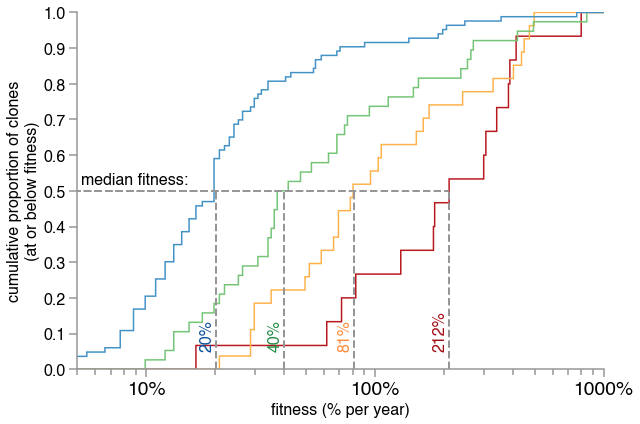

In [37]:
#cumulative incidence of mutations
fig, ax1 = plt.subplots(1, 1, figsize = (9, 6))
from matplotlib.patches import Rectangle

# Cumulative distributions.
for k, v in clone_number_fitness_cases.items():
#     print(k)
    n, bins, patches = ax1.hist(v, 1000, density=True, color = multiple_mutant_clone_colors[k][1], 
                                histtype = 'step', lw = 1.5, 
                                edgecolor = multiple_mutant_clone_colors[k][1],
                                   cumulative=1, label="Cumulative histogram", range =(0, 1100))
    
ax1.set_xlim(1, 1000)
# ax1.set_ylim(0, 1.01)

ax1.yaxis.set_major_locator(MultipleLocator(0.1))

for k, v in median_fitness_cases.items():
    ax1.plot([v, v], [0, 0.5], color = grey3, lw = 2, linestyle = '--')
    ax1.plot([0, v], [0.5, 0.5], color = grey3, lw = 2, linestyle = '--')
#     ax1.plot([0, 1000], [0.5, 0.5], color = grey3, lw = 2, linestyle = '--')
    label = k
    if label == 4:
        label = '>=4'
#     ax1.text(v, 1.07, str(label), ha = 'center', va = 'top', fontsize = 18, color = darker_clone_colours[k])
    ax1.text(v*0.98, 0.05, str(int(v))+'%', ha = 'right', va = 'bottom', fontsize = 16, color = darker_clone_colours[k], rotation = 90)
    
ax1.text(5.2, 0.51, 'median fitness:', ha = 'left', va = 'bottom', fontsize = 16)

ax1.set_ylabel('cumulative proportion of clones\n(at or below fitness)', fontsize = 16)
ax1.set_xlabel('fitness (% per year)', fontsize = 16)
# ax1.set_title('proportion of kth mutations acquired above age...')

ax1.set_xscale('log')
x_major_ticks = [1, 10, 100, 1000]
x_major_tick_labels = ["1%", "10%", "100%", "1000%"]
ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels)
ax1.set_xlim(5, 1000)
ax1.set_ylim(0, 1)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.yaxis.set_tick_params(width=1.5, color = grey3, length = 8)
ax1.xaxis.set_tick_params(width=1.5, color = grey3, length = 8)
ax1.tick_params(axis='both', which='major', labelsize=16)
for axis in ['bottom','left']:
    ax1.spines[axis].set_linewidth(1.5)
    ax1.spines[axis].set_color(grey3)
    
# ax1.yaxis.set_tick_params(which = 'both', width=1.5, color = grey3, length = 6, labelsize=helvetica_6)
ax1.xaxis.set_tick_params(which = 'major', width=1.5, color = grey3, length = 8, labelsize=helvetica_6)
ax1.xaxis.set_tick_params(which = 'minor', width=1.5, color = grey3, length = 6)

plt.tight_layout()
plt.show()